In [18]:
# %load init.ipy
%reload_ext autoreload
%autoreload 2

import os, sys

import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
import tqdm

CWD = os.path.abspath(os.path.curdir)
print("CWD: '{}'".format(CWD))

ODIR = os.path.join(CWD, "output", "")
if not os.path.exists(ODIR):
    os.makedirs(ODIR)
    print("Created output directory: '{}'".format(ODIR))

par_dir = os.path.join(CWD, os.path.pardir)
if par_dir not in sys.path:
    sys.path.append(par_dir)
    print("Added parent directory: '{}'".format(par_dir))

import bhem
import bhem.basics
import bhem.utils
import bhem.disks
import bhem.radiation
import bhem.spectra
from bhem.constants import MSOL, H_PLNK, K_BLTZ, SPLC, MPRT, MELC, QELC

np.seterr(over='ignore');

# Plotting settings
mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times']})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
plt.rcParams.update({'grid.alpha': 0.5})

FS_TITLE = 20
FS_LABEL = 16

plt.rcParams.update({'axes.titlesize': FS_TITLE})
plt.rcParams.update({'axes.labelsize': FS_LABEL})
plt.rcParams.update({'xtick.labelsize': FS_LABEL})
plt.rcParams.update({'ytick.labelsize': FS_LABEL})


CWD: '/Users/lzkelley/Programs/bhem/notebooks'


In [20]:
mass = np.logspace(6, 10, 41)
fedd = np.logspace(-4, 1, 51)

temp = np.zeros((mass.size, fedd.size))
for ii, mm in enumerate(tqdm.tqdm(mass)):
    for jj, ff in enumerate(fedd):
        adaf = bhem.disks.ADAF(mm*MSOL, fedd=ff, nrad=nrad, rmin=rmin, rmax=rmax)
        spec = bhem.spectra.Mahadevan96(adaf, freq_obs)
        temp[ii, jj] = spec.temp_e


  0%|          | 0/41 [00:00<?, ?it/s]

Electron temperature seems inconsistent (Te = 4.89e+09)!
	m: 1.00e+06, f: 1.00e-04
	Heating: 3.48e+31, Cooling: 1.77e+35, diff: 5.0863e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 6.98e+10)!
	m: 1.00e+06, f: 1.26e-04
	Heating: 7.50e+30, Cooling: 7.36e+35, diff: 9.8101e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.86e+09)!
	m: 1.00e+06, f: 1.58e-04
	Heating: 1.60e+32, Cooling: 2.52e+35, diff: 1.5764e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.39e+09)!
	m: 1.00e+06, f: 2.00e-04
	Heating: 6.62e+32, Cooling: 4.29e+35, diff: 6.4776e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.07e+10)!
	m: 1.00e+06, f: 2.51e-04
	Heating: 8.98e+31, Cooling: 5.83


  2%|▏         | 1/41 [00:00<00:13,  2.89it/s]

Electron temperature seems inconsistent (Te = 2.86e+09)!
	m: 1.26e+06, f: 1.00e-04
	Heating: 8.17e+31, Cooling: 2.09e+35, diff: 2.5638e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.61e+09)!
	m: 1.26e+06, f: 1.26e-04
	Heating: 9.65e+31, Cooling: 2.54e+35, diff: 2.6299e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.59e+11)!
	m: 1.26e+06, f: 1.58e-04
	Heating: 9.78e+30, Cooling: 1.78e+36, diff: 1.8158e+05
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.80e+09)!
	m: 1.26e+06, f: 2.00e-04
	Heating: 5.84e+32, Cooling: 4.05e+35, diff: 6.9382e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.01e+09)!
	m: 1.26e+06, f: 2.51e-04
	Heating: 7.92e+32, Cooling: 4.61


  5%|▍         | 2/41 [00:00<00:13,  2.97it/s]

Electron temperature seems inconsistent (Te = 3.35e+08)!
	m: 1.58e+06, f: 1.00e-04
	Heating: 2.10e+33, Cooling: 1.25e+37, diff: 5.9756e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.13e+11)!
	m: 1.58e+06, f: 1.26e-04
	Heating: 1.01e+31, Cooling: 1.49e+36, diff: 1.4716e+05
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.54e+09)!
	m: 1.58e+06, f: 1.58e-04
	Heating: 5.76e+32, Cooling: 4.47e+35, diff: 7.7430e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.04e+09)!
	m: 1.58e+06, f: 2.00e-04
	Heating: 6.21e+32, Cooling: 4.59e+35, diff: 7.3795e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.63e+10)!
	m: 1.58e+06, f: 2.51e-04
	Heating: 9.62e+31, Cooling: 1.13


  7%|▋         | 3/41 [00:00<00:11,  3.20it/s]

Electron temperature seems inconsistent (Te = 9.33e+10)!
	m: 2.00e+06, f: 1.00e-04
	Heating: 9.98e+30, Cooling: 1.35e+36, diff: 1.3514e+05
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.49e+09)!
	m: 2.00e+06, f: 1.26e-04
	Heating: 4.79e+32, Cooling: 4.57e+35, diff: 9.5277e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.45e+09)!
	m: 2.00e+06, f: 1.58e-04
	Heating: 7.88e+32, Cooling: 5.39e+35, diff: 6.8323e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.55e+10)!
	m: 2.00e+06, f: 2.00e-04
	Heating: 8.30e+31, Cooling: 1.10e+36, diff: 1.3276e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.12e+10)!
	m: 2.00e+06, f: 2.51e-04
	Heating: 7.10e+31, Cooling: 1.96


 10%|▉         | 4/41 [00:01<00:10,  3.39it/s]

Electron temperature seems inconsistent (Te = 1.46e+09)!
	m: 2.51e+06, f: 1.00e-04
	Heating: 3.93e+32, Cooling: 4.64e+35, diff: 1.1800e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.46e+09)!
	m: 2.51e+06, f: 1.26e-04
	Heating: 1.21e+32, Cooling: 5.44e+35, diff: 4.5085e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.50e+10)!
	m: 2.51e+06, f: 1.58e-04
	Heating: 7.09e+31, Cooling: 1.08e+36, diff: 1.5278e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.88e+10)!
	m: 2.51e+06, f: 2.00e-04
	Heating: 6.36e+31, Cooling: 1.89e+36, diff: 2.9629e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.20e+09)!
	m: 2.51e+06, f: 2.51e-04
	Heating: 3.25e+33, Cooling: 9.61


 12%|█▏        | 5/41 [00:01<00:10,  3.40it/s]

Electron temperature seems inconsistent (Te = 2.67e+09)!
	m: 3.16e+06, f: 1.00e-04
	Heating: 2.24e+32, Cooling: 4.50e+35, diff: 2.0114e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.46e+10)!
	m: 3.16e+06, f: 1.26e-04
	Heating: 6.04e+31, Cooling: 1.07e+36, diff: 1.7743e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.74e+10)!
	m: 3.16e+06, f: 1.58e-04
	Heating: 5.63e+31, Cooling: 1.84e+36, diff: 3.2640e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.22e+10)!
	m: 3.16e+06, f: 2.00e-04
	Heating: 4.27e+31, Cooling: 4.00e+36, diff: 9.3744e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.65e+08)!
	m: 3.16e+06, f: 2.51e-04
	Heating: 6.52e+33, Cooling: 1.55


 15%|█▍        | 6/41 [00:01<00:10,  3.43it/s]

Electron temperature seems inconsistent (Te = 1.44e+10)!
	m: 3.98e+06, f: 1.00e-04
	Heating: 5.15e+31, Cooling: 1.06e+36, diff: 2.0665e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.64e+10)!
	m: 3.98e+06, f: 1.26e-04
	Heating: 4.95e+31, Cooling: 1.81e+36, diff: 3.6469e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 7.50e+10)!
	m: 3.98e+06, f: 1.58e-04
	Heating: 4.01e+31, Cooling: 3.83e+36, diff: 9.5302e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.66e+09)!
	m: 3.98e+06, f: 2.00e-04
	Heating: 5.53e+32, Cooling: 1.25e+36, diff: 2.2501e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.76e+08)!
	m: 3.98e+06, f: 2.51e-04
	Heating: 8.05e+33, Cooling: 1.71


 17%|█▋        | 7/41 [00:01<00:09,  3.63it/s]

Electron temperature seems inconsistent (Te = 2.59e+10)!
	m: 5.01e+06, f: 1.00e-04
	Heating: 4.36e+31, Cooling: 1.79e+36, diff: 4.0973e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 7.07e+10)!
	m: 5.01e+06, f: 1.26e-04
	Heating: 3.74e+31, Cooling: 3.71e+36, diff: 9.9290e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.64e+09)!
	m: 5.01e+06, f: 1.58e-04
	Heating: 8.88e+32, Cooling: 1.02e+36, diff: 1.1470e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.69e+08)!
	m: 5.01e+06, f: 2.00e-04
	Heating: 6.48e+33, Cooling: 1.72e+36, diff: 2.6507e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.75e+08)!
	m: 5.01e+06, f: 2.51e-04
	Heating: 3.53e+34, Cooling: 1.26


 20%|█▉        | 8/41 [00:02<00:08,  3.82it/s]

Electron temperature seems inconsistent (Te = 6.82e+10)!
	m: 6.31e+06, f: 1.00e-04
	Heating: 3.48e+31, Cooling: 3.65e+36, diff: 1.0475e+05
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 6.47e+08)!
	m: 6.31e+06, f: 1.26e-04
	Heating: 5.00e+33, Cooling: 2.56e+36, diff: 5.1159e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.64e+08)!
	m: 6.31e+06, f: 1.58e-04
	Heating: 5.20e+33, Cooling: 1.74e+36, diff: 3.3273e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.87e+08)!
	m: 6.31e+06, f: 2.00e-04
	Heating: 7.93e+33, Cooling: 1.91e+36, diff: 2.3951e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.09e+08)!
	m: 6.31e+06, f: 2.51e-04
	Heating: 1.21e+34, Cooling: 2.13


 22%|██▏       | 9/41 [00:02<00:08,  3.91it/s]

Electron temperature seems inconsistent (Te = 1.32e+09)!
	m: 7.94e+06, f: 1.00e-04
	Heating: 1.43e+33, Cooling: 1.05e+36, diff: 7.3112e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.60e+08)!
	m: 7.94e+06, f: 1.26e-04
	Heating: 4.16e+33, Cooling: 1.74e+36, diff: 4.1752e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.82e+08)!
	m: 7.94e+06, f: 1.58e-04
	Heating: 6.36e+33, Cooling: 1.92e+36, diff: 3.0039e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.02e+08)!
	m: 7.94e+06, f: 2.00e-04
	Heating: 9.74e+33, Cooling: 2.14e+36, diff: 2.1904e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.21e+08)!
	m: 7.94e+06, f: 2.51e-04
	Heating: 1.50e+34, Cooling: 2.44


 24%|██▍       | 10/41 [00:02<00:07,  4.15it/s]

Electron temperature seems inconsistent (Te = 8.58e+08)!
	m: 1.00e+07, f: 1.00e-04
	Heating: 3.33e+33, Cooling: 1.75e+36, diff: 5.2363e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.78e+08)!
	m: 1.00e+07, f: 1.26e-04
	Heating: 5.09e+33, Cooling: 1.92e+36, diff: 3.7673e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.97e+08)!
	m: 1.00e+07, f: 1.58e-04
	Heating: 7.81e+33, Cooling: 2.15e+36, diff: 2.7453e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.14e+08)!
	m: 1.00e+07, f: 2.00e-04
	Heating: 1.20e+34, Cooling: 2.45e+36, diff: 2.0254e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.32e+08)!
	m: 1.00e+07, f: 2.51e-04
	Heating: 1.85e+34, Cooling: 2.82


 27%|██▋       | 11/41 [00:02<00:07,  4.24it/s]

Electron temperature seems inconsistent (Te = 8.76e+08)!
	m: 1.26e+07, f: 1.00e-04
	Heating: 4.07e+33, Cooling: 1.93e+36, diff: 4.7230e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.93e+08)!
	m: 1.26e+07, f: 1.26e-04
	Heating: 6.25e+33, Cooling: 2.16e+36, diff: 3.4412e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.09e+08)!
	m: 1.26e+07, f: 1.58e-04
	Heating: 9.64e+33, Cooling: 2.45e+36, diff: 2.5369e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.25e+08)!
	m: 1.26e+07, f: 2.00e-04
	Heating: 1.49e+34, Cooling: 2.83e+36, diff: 1.8916e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.41e+08)!
	m: 1.26e+07, f: 2.51e-04
	Heating: 2.30e+34, Cooling: 3.30


 29%|██▉       | 12/41 [00:03<00:06,  4.41it/s]

Electron temperature seems inconsistent (Te = 8.91e+08)!
	m: 1.58e+07, f: 1.00e-04
	Heating: 5.00e+33, Cooling: 2.16e+36, diff: 4.3128e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.06e+08)!
	m: 1.58e+07, f: 1.26e-04
	Heating: 7.71e+33, Cooling: 2.46e+36, diff: 3.1787e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.20e+08)!
	m: 1.58e+07, f: 1.58e-04
	Heating: 1.19e+34, Cooling: 2.84e+36, diff: 2.3680e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.34e+08)!
	m: 1.58e+07, f: 2.00e-04
	Heating: 1.85e+34, Cooling: 3.31e+36, diff: 1.7825e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.48e+08)!
	m: 1.58e+07, f: 2.51e-04
	Heating: 2.86e+34, Cooling: 3.91


 32%|███▏      | 13/41 [00:03<00:06,  4.45it/s]

Electron temperature seems inconsistent (Te = 9.03e+08)!
	m: 2.00e+07, f: 1.00e-04
	Heating: 6.17e+33, Cooling: 2.46e+36, diff: 3.9827e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.17e+08)!
	m: 2.00e+07, f: 1.26e-04
	Heating: 9.54e+33, Cooling: 2.84e+36, diff: 2.9660e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.29e+08)!
	m: 2.00e+07, f: 1.58e-04
	Heating: 1.48e+34, Cooling: 3.32e+36, diff: 2.2304e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.42e+08)!
	m: 2.00e+07, f: 2.00e-04
	Heating: 2.30e+34, Cooling: 3.91e+36, diff: 1.6933e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.33e+09)!
	m: 2.00e+07, f: 2.51e-04
	Heating: 1.03e+34, Cooling: 5.58


 34%|███▍      | 14/41 [00:03<00:06,  4.47it/s]

Electron temperature seems inconsistent (Te = 9.14e+08)!
	m: 2.51e+07, f: 1.00e-04
	Heating: 7.63e+33, Cooling: 2.84e+36, diff: 3.7154e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.26e+08)!
	m: 2.51e+07, f: 1.26e-04
	Heating: 1.18e+34, Cooling: 3.32e+36, diff: 2.7928e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.37e+08)!
	m: 2.51e+07, f: 1.58e-04
	Heating: 1.84e+34, Cooling: 3.92e+36, diff: 2.1179e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.31e+09)!
	m: 2.51e+07, f: 2.00e-04
	Heating: 1.80e+34, Cooling: 4.66e+36, diff: 2.5802e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.65e+08)!
	m: 2.51e+07, f: 2.51e-04
	Heating: 4.42e+34, Cooling: 5.61


 37%|███▋      | 15/41 [00:03<00:05,  4.46it/s]

Electron temperature seems inconsistent (Te = 9.24e+08)!
	m: 3.16e+07, f: 1.00e-04
	Heating: 9.46e+33, Cooling: 3.32e+36, diff: 3.4992e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.34e+08)!
	m: 3.16e+07, f: 1.26e-04
	Heating: 1.47e+34, Cooling: 3.92e+36, diff: 2.6512e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.51e+08)!
	m: 3.16e+07, f: 1.58e-04
	Heating: 6.75e+34, Cooling: 1.09e+37, diff: 1.5967e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.58e+08)!
	m: 3.16e+07, f: 2.00e-04
	Heating: 3.55e+34, Cooling: 5.61e+36, diff: 1.5686e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.26e+09)!
	m: 3.16e+07, f: 2.51e-04
	Heating: 1.70e+34, Cooling: 8.63


 39%|███▉      | 16/41 [00:04<00:05,  4.35it/s]

Electron temperature seems inconsistent (Te = 9.32e+08)!
	m: 3.98e+07, f: 1.00e-04
	Heating: 1.18e+34, Cooling: 3.92e+36, diff: 3.3217e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.41e+08)!
	m: 3.98e+07, f: 1.26e-04
	Heating: 1.83e+34, Cooling: 4.67e+36, diff: 2.5364e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.53e+08)!
	m: 3.98e+07, f: 1.58e-04
	Heating: 2.85e+34, Cooling: 5.61e+36, diff: 1.9593e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.26e+08)!
	m: 3.98e+07, f: 2.00e-04
	Heating: 3.75e+35, Cooling: 1.13e+38, diff: 3.0077e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.02e+09)!
	m: 3.98e+07, f: 2.51e-04
	Heating: 6.49e+34, Cooling: 8.32


 41%|████▏     | 17/41 [00:04<00:05,  4.21it/s]

Electron temperature seems inconsistent (Te = 9.39e+08)!
	m: 5.01e+07, f: 1.00e-04
	Heating: 1.47e+34, Cooling: 4.67e+36, diff: 3.1776e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.49e+08)!
	m: 5.01e+07, f: 1.26e-04
	Heating: 2.28e+34, Cooling: 5.61e+36, diff: 2.4507e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.68e+08)!
	m: 5.01e+07, f: 1.58e-04
	Heating: 3.50e+34, Cooling: 6.79e+36, diff: 1.9279e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.01e+09)!
	m: 5.01e+07, f: 2.00e-04
	Heating: 5.25e+34, Cooling: 8.30e+36, diff: 1.5722e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.08e+09)!
	m: 5.01e+07, f: 2.51e-04
	Heating: 7.51e+34, Cooling: 1.03


 44%|████▍     | 18/41 [00:04<00:05,  4.33it/s]

Electron temperature seems inconsistent (Te = 9.47e+08)!
	m: 6.31e+07, f: 1.00e-04
	Heating: 1.82e+34, Cooling: 5.61e+36, diff: 3.0696e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.64e+08)!
	m: 6.31e+07, f: 1.26e-04
	Heating: 2.81e+34, Cooling: 6.79e+36, diff: 2.4084e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.98e+08)!
	m: 6.31e+07, f: 1.58e-04
	Heating: 4.22e+34, Cooling: 8.29e+36, diff: 1.9536e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.06e+09)!
	m: 6.31e+07, f: 2.00e-04
	Heating: 6.11e+34, Cooling: 1.03e+37, diff: 1.6738e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.18e+09)!
	m: 6.31e+07, f: 2.51e-04
	Heating: 8.29e+34, Cooling: 1.31


 46%|████▋     | 19/41 [00:04<00:05,  4.33it/s]

Electron temperature seems inconsistent (Te = 9.62e+08)!
	m: 7.94e+07, f: 1.00e-04
	Heating: 2.24e+34, Cooling: 6.79e+36, diff: 3.0151e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.94e+08)!
	m: 7.94e+07, f: 1.26e-04
	Heating: 3.39e+34, Cooling: 8.29e+36, diff: 2.4384e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.05e+09)!
	m: 7.94e+07, f: 1.58e-04
	Heating: 4.94e+34, Cooling: 1.03e+37, diff: 2.0689e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.16e+09)!
	m: 7.94e+07, f: 2.00e-04
	Heating: 6.80e+34, Cooling: 1.30e+37, diff: 1.9018e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.69e+08)!
	m: 7.94e+07, f: 2.51e-04
	Heating: 5.72e+35, Cooling: 2.89


 49%|████▉     | 20/41 [00:04<00:04,  4.36it/s]

Electron temperature seems inconsistent (Te = 9.90e+08)!
	m: 1.00e+08, f: 1.00e-04
	Heating: 2.71e+34, Cooling: 8.28e+36, diff: 3.0454e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.05e+09)!
	m: 1.00e+08, f: 1.26e-04
	Heating: 3.97e+34, Cooling: 1.02e+37, diff: 2.5747e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.14e+09)!
	m: 1.00e+08, f: 1.58e-04
	Heating: 5.53e+34, Cooling: 1.29e+37, diff: 2.3319e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.70e+08)!
	m: 1.00e+08, f: 2.00e-04
	Heating: 4.53e+35, Cooling: 2.87e+37, diff: 6.2374e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.69e+08)!
	m: 1.00e+08, f: 2.51e-04
	Heating: 3.80e+35, Cooling: 1.92


 51%|█████     | 21/41 [00:05<00:04,  4.45it/s]

Electron temperature seems inconsistent (Te = 1.04e+09)!
	m: 1.26e+08, f: 1.00e-04
	Heating: 3.18e+34, Cooling: 1.02e+37, diff: 3.2077e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.13e+09)!
	m: 1.26e+08, f: 1.26e-04
	Heating: 4.45e+34, Cooling: 1.29e+37, diff: 2.8888e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.74e+08)!
	m: 1.26e+08, f: 1.58e-04
	Heating: 2.50e+35, Cooling: 1.90e+37, diff: 7.5110e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 6.71e+08)!
	m: 1.26e+08, f: 2.00e-04
	Heating: 2.37e+35, Cooling: 1.83e+37, diff: 7.6013e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.32e+09)!
	m: 1.26e+08, f: 2.51e-04
	Heating: 4.13e+34, Cooling: 4.06


 54%|█████▎    | 22/41 [00:05<00:04,  4.50it/s]

Electron temperature seems inconsistent (Te = 1.12e+09)!
	m: 1.58e+08, f: 1.00e-04
	Heating: 3.58e+34, Cooling: 1.29e+37, diff: 3.5853e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.40e+10)!
	m: 1.58e+08, f: 1.26e-04
	Heating: 3.14e+33, Cooling: 5.22e+37, diff: 1.6600e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.90e+10)!
	m: 1.58e+08, f: 1.58e-04
	Heating: 3.69e+33, Cooling: 7.66e+37, diff: 2.0758e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.42e+08)!
	m: 1.58e+08, f: 2.00e-04
	Heating: 5.51e+35, Cooling: 2.72e+37, diff: 4.8412e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.71e+09)!
	m: 1.58e+08, f: 2.51e-04
	Heating: 4.54e+34, Cooling: 5.38


 56%|█████▌    | 23/41 [00:05<00:04,  4.48it/s]

Electron temperature seems inconsistent (Te = 6.32e+09)!
	m: 2.00e+08, f: 1.00e-04
	Heating: 5.33e+33, Cooling: 3.52e+37, diff: 6.5974e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 8.25e+08)!
	m: 2.00e+08, f: 1.26e-04
	Heating: 1.11e+35, Cooling: 1.84e+37, diff: 1.6427e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.30e+08)!
	m: 2.00e+08, f: 1.58e-04
	Heating: 6.76e+35, Cooling: 4.47e+37, diff: 6.5099e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.97e+08)!
	m: 2.00e+08, f: 2.00e-04
	Heating: 4.46e+35, Cooling: 2.72e+37, diff: 6.0044e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.71e+08)!
	m: 2.00e+08, f: 2.51e-04
	Heating: 2.27e+36, Cooling: 8.81


 59%|█████▊    | 24/41 [00:05<00:03,  4.39it/s]

Electron temperature seems inconsistent (Te = 8.26e+08)!
	m: 2.51e+08, f: 1.00e-04
	Heating: 8.84e+34, Cooling: 1.83e+37, diff: 2.0662e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.51e+10)!
	m: 2.51e+08, f: 1.26e-04
	Heating: 3.23e+33, Cooling: 1.11e+38, diff: 3.4350e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.59e+08)!
	m: 2.51e+08, f: 1.58e-04
	Heating: 5.22e+35, Cooling: 3.05e+37, diff: 5.7484e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 6.44e+10)!
	m: 2.51e+08, f: 2.00e-04
	Heating: 3.83e+33, Cooling: 2.81e+38, diff: 7.3392e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.11e+09)!
	m: 2.51e+08, f: 2.51e-04
	Heating: 1.48e+35, Cooling: 6.47


 61%|██████    | 25/41 [00:06<00:03,  4.49it/s]

Electron temperature seems inconsistent (Te = 7.45e+09)!
	m: 3.16e+08, f: 1.00e-04
	Heating: 7.19e+33, Cooling: 6.05e+37, diff: 8.4091e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.99e+08)!
	m: 3.16e+08, f: 1.26e-04
	Heating: 5.12e+35, Cooling: 3.54e+37, diff: 6.8221e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.44e+10)!
	m: 3.16e+08, f: 1.58e-04
	Heating: 6.09e+33, Cooling: 1.73e+38, diff: 2.8458e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.92e+08)!
	m: 3.16e+08, f: 2.00e-04
	Heating: 1.32e+36, Cooling: 4.80e+37, diff: 3.5510e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.83e+08)!
	m: 3.16e+08, f: 2.51e-04
	Heating: 1.53e+36, Cooling: 5.01


 63%|██████▎   | 26/41 [00:06<00:03,  4.39it/s]

Electron temperature seems inconsistent (Te = 3.65e+08)!
	m: 3.98e+08, f: 1.00e-04
	Heating: 4.63e+35, Cooling: 4.03e+37, diff: 8.6148e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.44e+10)!
	m: 3.98e+08, f: 1.26e-04
	Heating: 7.69e+33, Cooling: 1.33e+38, diff: 1.7313e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.69e+08)!
	m: 3.98e+08, f: 1.58e-04
	Heating: 1.14e+36, Cooling: 5.14e+37, diff: 4.4026e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.74e+08)!
	m: 3.98e+08, f: 2.00e-04
	Heating: 1.78e+36, Cooling: 5.86e+37, diff: 3.1977e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.33e+09)!
	m: 3.98e+08, f: 2.51e-04
	Heating: 1.30e+35, Cooling: 1.28


 66%|██████▌   | 27/41 [00:06<00:03,  4.47it/s]

Electron temperature seems inconsistent (Te = 1.08e+10)!
	m: 5.01e+08, f: 1.00e-04
	Heating: 8.13e+33, Cooling: 1.16e+38, diff: 1.4207e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.52e+08)!
	m: 5.01e+08, f: 1.26e-04
	Heating: 9.73e+35, Cooling: 5.48e+37, diff: 5.5305e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.86e+09)!
	m: 5.01e+08, f: 1.58e-04
	Heating: 5.54e+34, Cooling: 1.09e+38, diff: 1.9737e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.09e+09)!
	m: 5.01e+08, f: 2.00e-04
	Heating: 1.14e+35, Cooling: 1.23e+38, diff: 1.0772e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.88e+09)!
	m: 5.01e+08, f: 2.51e-04
	Heating: 8.39e+34, Cooling: 2.14


 68%|██████▊   | 28/41 [00:06<00:02,  4.58it/s]

Electron temperature seems inconsistent (Te = 3.41e+08)!
	m: 6.31e+08, f: 1.00e-04
	Heating: 8.11e+35, Cooling: 5.75e+37, diff: 6.9884e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.27e+09)!
	m: 6.31e+08, f: 1.26e-04
	Heating: 3.14e+34, Cooling: 1.28e+38, diff: 4.0652e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.92e+09)!
	m: 6.31e+08, f: 1.58e-04
	Heating: 9.83e+34, Cooling: 1.20e+38, diff: 1.2189e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.20e+09)!
	m: 6.31e+08, f: 2.00e-04
	Heating: 7.74e+34, Cooling: 2.01e+38, diff: 2.5957e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.59e+10)!
	m: 6.31e+08, f: 2.51e-04
	Heating: 3.91e+34, Cooling: 4.43


 71%|███████   | 29/41 [00:06<00:02,  4.63it/s]

Electron temperature seems inconsistent (Te = 4.11e+08)!
	m: 7.94e+08, f: 1.00e-04
	Heating: 7.75e+35, Cooling: 5.38e+37, diff: 6.8397e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.81e+09)!
	m: 7.94e+08, f: 1.26e-04
	Heating: 8.28e+34, Cooling: 1.18e+38, diff: 1.4198e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.74e+09)!
	m: 7.94e+08, f: 1.58e-04
	Heating: 6.93e+34, Cooling: 1.92e+38, diff: 2.7721e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.26e+10)!
	m: 7.94e+08, f: 2.00e-04
	Heating: 3.97e+34, Cooling: 3.94e+38, diff: 9.9054e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.14e+08)!
	m: 7.94e+08, f: 2.51e-04
	Heating: 3.44e+37, Cooling: 3.10


 73%|███████▎  | 30/41 [00:07<00:02,  4.61it/s]

Electron temperature seems inconsistent (Te = 3.49e+08)!
	m: 1.00e+09, f: 1.00e-04
	Heating: 1.24e+36, Cooling: 7.30e+37, diff: 5.7715e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.45e+09)!
	m: 1.00e+09, f: 1.26e-04
	Heating: 6.01e+34, Cooling: 1.86e+38, diff: 3.0979e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.06e+10)!
	m: 1.00e+09, f: 1.58e-04
	Heating: 3.82e+34, Cooling: 3.61e+38, diff: 9.4555e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 5.29e+08)!
	m: 1.00e+09, f: 2.00e-04
	Heating: 2.67e+36, Cooling: 1.12e+38, diff: 4.0967e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.51e+08)!
	m: 1.00e+09, f: 2.51e-04
	Heating: 1.28e+37, Cooling: 2.07


 76%|███████▌  | 31/41 [00:07<00:02,  4.66it/s]

Electron temperature seems inconsistent (Te = 4.15e+08)!
	m: 1.26e+09, f: 1.00e-04
	Heating: 1.21e+36, Cooling: 7.58e+37, diff: 6.1631e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 9.45e+09)!
	m: 1.26e+09, f: 1.26e-04
	Heating: 3.50e+34, Cooling: 3.41e+38, diff: 9.7516e+03
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.87e+08)!
	m: 1.26e+09, f: 1.58e-04
	Heating: 1.05e+37, Cooling: 3.09e+38, diff: 2.8349e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.48e+08)!
	m: 1.26e+09, f: 2.00e-04
	Heating: 1.03e+37, Cooling: 2.11e+38, diff: 1.9440e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 4.26e+08)!
	m: 1.26e+09, f: 2.51e-04
	Heating: 7.34e+36, Cooling: 1.65


 78%|███████▊  | 32/41 [00:07<00:02,  4.44it/s]

Electron temperature seems inconsistent (Te = 8.74e+09)!
	m: 1.58e+09, f: 1.00e-04
	Heating: 3.10e+34, Cooling: 3.28e+38, diff: 1.0564e+04
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.85e+08)!
	m: 1.58e+09, f: 1.26e-04
	Heating: 2.70e+36, Cooling: 1.13e+38, diff: 4.0718e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.47e+08)!
	m: 1.58e+09, f: 1.58e-04
	Heating: 8.29e+36, Cooling: 2.14e+38, diff: 2.4791e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.50e+08)!
	m: 1.58e+09, f: 2.00e-04
	Heating: 1.29e+37, Cooling: 2.35e+38, diff: 1.7255e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.54e+08)!
	m: 1.58e+09, f: 2.51e-04
	Heating: 2.00e+37, Cooling: 2.62


 80%|████████  | 33/41 [00:07<00:01,  4.32it/s]

Electron temperature seems inconsistent (Te = 3.13e+08)!
	m: 2.00e+09, f: 1.00e-04
	Heating: 2.91e+36, Cooling: 1.29e+38, diff: 4.3262e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.45e+08)!
	m: 2.00e+09, f: 1.26e-04
	Heating: 6.64e+36, Cooling: 2.16e+38, diff: 3.1514e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.48e+08)!
	m: 2.00e+09, f: 1.58e-04
	Heating: 1.03e+37, Cooling: 2.38e+38, diff: 2.1995e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.51e+08)!
	m: 2.00e+09, f: 2.00e-04
	Heating: 1.61e+37, Cooling: 2.66e+38, diff: 1.5514e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.55e+08)!
	m: 2.00e+09, f: 2.51e-04
	Heating: 2.50e+37, Cooling: 3.01


 83%|████████▎ | 34/41 [00:08<00:01,  4.48it/s]

Electron temperature seems inconsistent (Te = 7.41e+08)!
	m: 2.51e+09, f: 1.00e-04
	Heating: 1.03e+36, Cooling: 1.56e+38, diff: 1.5006e+02
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.47e+08)!
	m: 2.51e+09, f: 1.26e-04
	Heating: 8.28e+36, Cooling: 2.40e+38, diff: 2.7949e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.50e+08)!
	m: 2.51e+09, f: 1.58e-04
	Heating: 1.29e+37, Cooling: 2.68e+38, diff: 1.9768e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.52e+08)!
	m: 2.51e+09, f: 2.00e-04
	Heating: 2.01e+37, Cooling: 3.04e+38, diff: 1.4119e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.56e+08)!
	m: 2.51e+09, f: 2.51e-04
	Heating: 3.13e+37, Cooling: 3.50


 85%|████████▌ | 35/41 [00:08<00:01,  4.65it/s]

Electron temperature seems inconsistent (Te = 2.46e+08)!
	m: 3.16e+09, f: 1.00e-04
	Heating: 6.62e+36, Cooling: 2.41e+38, diff: 3.5422e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.48e+08)!
	m: 3.16e+09, f: 1.26e-04
	Heating: 1.03e+37, Cooling: 2.70e+38, diff: 2.5114e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.51e+08)!
	m: 3.16e+09, f: 1.58e-04
	Heating: 1.61e+37, Cooling: 3.06e+38, diff: 1.7985e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.53e+08)!
	m: 3.16e+09, f: 2.00e-04
	Heating: 2.52e+37, Cooling: 3.52e+38, diff: 1.2996e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.56e+08)!
	m: 3.16e+09, f: 2.51e-04
	Heating: 3.92e+37, Cooling: 4.10


 88%|████████▊ | 36/41 [00:08<00:01,  4.55it/s]

Electron temperature seems inconsistent (Te = 2.47e+08)!
	m: 3.98e+09, f: 1.00e-04
	Heating: 8.26e+36, Cooling: 2.71e+38, diff: 3.1828e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.49e+08)!
	m: 3.98e+09, f: 1.26e-04
	Heating: 1.29e+37, Cooling: 3.08e+38, diff: 2.2846e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.52e+08)!
	m: 3.98e+09, f: 1.58e-04
	Heating: 2.02e+37, Cooling: 3.55e+38, diff: 1.6552e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.54e+08)!
	m: 3.98e+09, f: 2.00e-04
	Heating: 3.16e+37, Cooling: 4.13e+38, diff: 1.2090e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.57e+08)!
	m: 3.98e+09, f: 2.51e-04
	Heating: 4.92e+37, Cooling: 4.87


 90%|█████████ | 37/41 [00:08<00:00,  4.28it/s]

Electron temperature seems inconsistent (Te = 2.48e+08)!
	m: 5.01e+09, f: 1.00e-04
	Heating: 1.03e+37, Cooling: 3.09e+38, diff: 2.8952e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.50e+08)!
	m: 5.01e+09, f: 1.26e-04
	Heating: 1.62e+37, Cooling: 3.56e+38, diff: 2.1023e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.52e+08)!
	m: 5.01e+09, f: 1.58e-04
	Heating: 2.53e+37, Cooling: 4.15e+38, diff: 1.5395e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.55e+08)!
	m: 5.01e+09, f: 2.00e-04
	Heating: 3.96e+37, Cooling: 4.89e+38, diff: 1.1356e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.57e+08)!
	m: 5.01e+09, f: 2.51e-04
	Heating: 6.18e+37, Cooling: 5.82


 93%|█████████▎| 38/41 [00:08<00:00,  4.20it/s]

Electron temperature seems inconsistent (Te = 2.49e+08)!
	m: 6.31e+09, f: 1.00e-04
	Heating: 1.29e+37, Cooling: 3.58e+38, diff: 2.6642e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.51e+08)!
	m: 6.31e+09, f: 1.26e-04
	Heating: 2.03e+37, Cooling: 4.17e+38, diff: 1.9553e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.53e+08)!
	m: 6.31e+09, f: 1.58e-04
	Heating: 3.18e+37, Cooling: 4.91e+38, diff: 1.4459e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.55e+08)!
	m: 6.31e+09, f: 2.00e-04
	Heating: 4.97e+37, Cooling: 5.85e+38, diff: 1.0760e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 3.24e+08)!
	m: 6.31e+09, f: 2.51e-04
	Heating: 5.52e+37, Cooling: 6.94


 95%|█████████▌| 39/41 [00:09<00:00,  4.19it/s]

Electron temperature seems inconsistent (Te = 2.50e+08)!
	m: 7.94e+09, f: 1.00e-04
	Heating: 1.62e+37, Cooling: 4.18e+38, diff: 2.4780e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.52e+08)!
	m: 7.94e+09, f: 1.26e-04
	Heating: 2.54e+37, Cooling: 4.92e+38, diff: 1.8364e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.54e+08)!
	m: 7.94e+09, f: 1.58e-04
	Heating: 3.99e+37, Cooling: 5.86e+38, diff: 1.3699e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 1.26e+08)!
	m: 7.94e+09, f: 2.00e-04
	Heating: 1.86e+38, Cooling: 2.52e+39, diff: 1.2563e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.59e+08)!
	m: 7.94e+09, f: 2.51e-04
	Heating: 9.70e+37, Cooling: 8.52


 98%|█████████▊| 40/41 [00:09<00:00,  4.35it/s]

Electron temperature seems inconsistent (Te = 2.51e+08)!
	m: 1.00e+10, f: 1.00e-04
	Heating: 2.03e+37, Cooling: 4.93e+38, diff: 2.3274e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.52e+08)!
	m: 1.00e+10, f: 1.26e-04
	Heating: 3.19e+37, Cooling: 5.87e+38, diff: 1.7399e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.54e+08)!
	m: 1.00e+10, f: 1.58e-04
	Heating: 5.01e+37, Cooling: 7.05e+38, diff: 1.3085e+01
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.56e+08)!
	m: 1.00e+10, f: 2.00e-04
	Heating: 7.82e+37, Cooling: 8.53e+38, diff: 9.9064e+00
	This may mean there is an input error (e.g. mdot may be too large... or small?).
Electron temperature seems inconsistent (Te = 2.61e+08)!
	m: 1.00e+10, f: 2.51e-04
	Heating: 1.21e+38, Cooling: 1.04


100%|██████████| 41/41 [00:09<00:00,  4.57it/s]

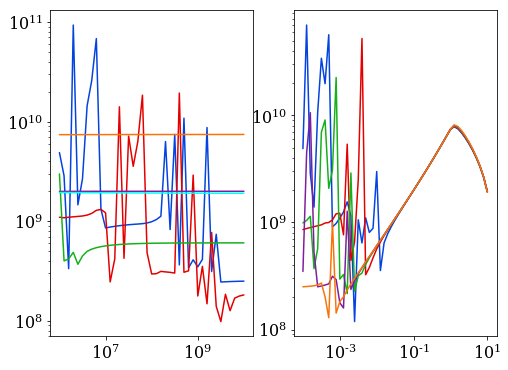

In [23]:
import zcode.plot as zplot

fig, axes = zplot.figax(ncols=2)

for ii, par in enumerate([mass, fedd]):
    ax = axes[ii] 
    data = temp.T if ii == 0 else temp
    data = data[::10]
    colors = zplot.color_set(len(data))
    
    for jj, dd in enumerate(data):
        cc = colors[jj]
        ax.plot(par, dd, color=cc)
    
plt.show()

In [16]:
# mass = 6.53e+06
# fedd = 7.85e0

# mass = 6.53e+06
# fedd = 7.85e-03
msol=6.5350e+06
fedd=7.8528e-03

nrad = 2000
# rmin = 3.0
# rmax = 100000.0
rmin=4.412e+06
rmax=4.412e+08
freq_obs = 544087840290381.1

# adaf = bhem.disks.ADAF(mass*MSOL, fedd=fedd)
# freqs = np.logspace(5, 25, 100)
# m96 = bhem.spectra.Mahadevan96(adaf, freqs)


adaf = bhem.disks.ADAF(mass*MSOL, fedd=fedd, nrad=nrad, rmin=rmin, rmax=rmax)
spec = bhem.spectra.Mahadevan96(adaf, freq_obs, log=0)
lums = spec.spectrum
print(lums)
print(spec)

1.4839609266100277e+21
Mahadevan96(msol=6.5300e+06, fedd=7.8528e-03, alpha=1.000e-01, beta=5.000e-01, eps_prime=1.130e+00, delta=5.446e-04, c1=4.128e-01, c3=2.752e-01, rmin=4.412e+06, rmax=4.412e+08)
